In [25]:
#AutoCompletar funciones.
%config IPCompleter.greedy=True

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [27]:
#Descargo el archivo unificado de la fase anterior (2.3) 
fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"
df =  pd.read_csv(fichero,encoding="UTF-8")
df['FECHAH'] = pd.to_datetime(df['FECHAH'])
### Random Forest para NO2

## Random Forest aislando el contaminante
Prueba, si excluyendo el resto de contaminantes y quedandonos solo con el NO2 cual es la capacidad del algoritmo de predecir su comportamiento. 

In [28]:
df2 = df.iloc[:,9:]
df2

,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA
0,0.68,48.0,2.6,71.0,959.0,0.0,415.0,489.0,904.0
1,0.69,32.0,2.5,71.0,959.0,0.0,757.0,732.0,1489.0
2,0.70,43.0,1.7,74.0,959.0,0.0,624.0,567.0,1191.0
3,0.70,74.0,1.1,75.0,959.0,0.0,474.0,495.0,969.0
4,0.66,67.0,1.2,74.0,959.0,0.0,285.0,335.0,620.0
...,...,...,...,...,...,...,...,...,...
27762,NaN,NaN,NaN,NaN,NaN,NaN,538.0,654.0,1192.0
27763,NaN,NaN,NaN,NaN,NaN,NaN,495.0,603.0,1098.0
27764,NaN,NaN,NaN,NaN,NaN,NaN,380.0,485.0,865.0
27765,NaN,NaN,NaN,NaN,NaN,NaN,652.0,731.0,1383.0


In [6]:
#df2 = df.iloc[:,9:]
#Añadimos a df2 la columna correspondiente a NO2
df2["NO2"] = df["NO2"]
df2['ES10'] = df2['ES10'].shift(1)
df2['ES53'] = df2['ES53'].shift(1)
#df2['ESSUMA'] = df2['ESSUMA'].shift(1)
#Eliminamos las filas que contengan valores nulos y guardamos en df3
df3 = df2.dropna()
df3

,VELOCIDAD VIENTO,DIR. VIENTO,TEMPERATURA,HUMEDAD RELATIVA,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,NO2
1,0.69,32.0,2.5,71.0,959.0,0.0,415.0,489.0,1489.0,82.0
2,0.70,43.0,1.7,74.0,959.0,0.0,757.0,732.0,1191.0,72.0
3,0.70,74.0,1.1,75.0,959.0,0.0,624.0,567.0,969.0,66.0
4,0.66,67.0,1.2,74.0,959.0,0.0,474.0,495.0,620.0,64.0
5,0.67,31.0,0.2,78.0,959.0,0.0,285.0,335.0,524.0,56.0
...,...,...,...,...,...,...,...,...,...,...
22564,1.94,281.0,25.3,34.0,943.0,0.0,511.0,691.0,1229.0,13.0
22565,1.96,289.0,23.7,35.0,944.0,0.0,531.0,698.0,1211.0,13.0
22566,1.62,300.0,22.6,36.0,944.0,0.0,531.0,680.0,1138.0,15.0
22567,1.35,73.0,21.4,43.0,945.0,0.0,484.0,654.0,1064.0,28.0


In [7]:
#asignamos a la y la columna de NO2 el resto a la x 
y = df3.NO2
X = df3.iloc[:,:-1]

regr = RandomForestRegressor(max_depth=70, n_estimators =100, random_state=0)

#Dividimos el model de entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
modelo = regr.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

#Calculamos el RMSE y MAE (rmse El error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("Rmse:",rmse,"MAE:",mae)

Rmse: 15.641652015373403 MAE: 10.842547735191637


In [8]:
len(X),len(X_train),len(X_test)

(21742, 14567, 7175)

In [9]:
y_pred = modelo.predict(X_test)
ys = list(zip(list(y_test),list(y_pred)))

##### Representacion grafica de Random Forest
Se puede apreciar en la grafica que si se añaden el resto de contaminantes, excluyendo el NO y NOx puede predecir de forma eficiente el comportamiento de la contaminación

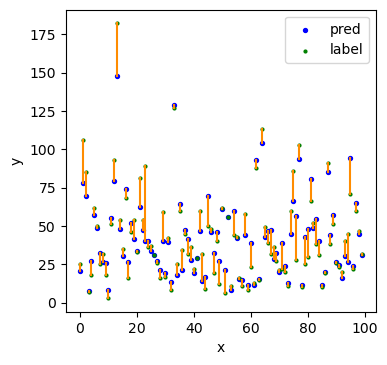

In [10]:
cuantos = 100
ypred = y_pred[:cuantos]
ylabel = list(y_test)[:cuantos]
x = list(range(len(ylabel)))
plt.rcParams["font.size"] = 10
figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
for i in range(len(x)):
    plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

plt.scatter(x,ypred, color='blue', label="pred",s=8)
plt.scatter(x,ylabel, color='green', label="label",s=4)


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Random Forest:

In [19]:
fichero = "https://raw.githubusercontent.com/albercol/TFG/main/Fase2/Fase%202.3/DatosUnificados/Cont_Meteo_Traf.csv"

df = pd.read_csv(fichero,parse_dates=['FECHAH'])

#Desplazamiento horario en la columna del tráfico
df['ES10'] = df2['ES10'].shift(1)
df['ES53'] = df2['ES53'].shift(1)
df = df.dropna()
df["hora"] = df['FECHAH'].dt.hour

valores = df.TIPO.unique()
for v in valores:
    print(v)
    df[v] = df.TIPO.apply(lambda x: 1 if x==v else 0)
    
df

LABORABLE
SABADO
DOMINGO
FESTIVO


,FECHAH,TIPO,CO,NO,NO2,PM2.5,PM10,NOx,O3,VELOCIDAD VIENTO,...,PRESION BAROMETRICA,PRECIPITACIONES,ES10,ES53,ESSUMA,hora,LABORABLE,SABADO,DOMINGO,FESTIVO
5037,2019-08-01 02:00:00,LABORABLE,0.1,4.0,14.0,9.0,18.0,19.0,66.50,1.72,...,943.0,0.0,422.0,336.0,287.0,2,1,0,0,0
5038,2019-08-01 03:00:00,LABORABLE,0.1,1.0,14.0,10.0,18.0,15.0,66.62,1.55,...,943.0,0.0,353.0,230.0,209.0,3,1,0,0,0
5039,2019-08-01 04:00:00,LABORABLE,0.2,2.0,15.0,10.0,19.0,18.0,62.57,1.13,...,943.0,0.0,223.0,347.0,194.0,4,1,0,0,0
5040,2019-08-01 05:00:00,LABORABLE,0.2,2.0,17.0,8.0,15.0,20.0,60.03,1.26,...,943.0,0.0,173.0,231.0,259.0,5,1,0,0,0
5041,2019-08-01 06:00:00,LABORABLE,0.2,7.0,33.0,6.0,13.0,44.0,48.02,1.24,...,943.0,0.0,107.0,180.0,575.0,6,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20948,2021-05-25 10:00:00,LABORABLE,0.3,18.0,38.0,9.0,18.0,66.0,47.20,1.37,...,953.0,0.0,429.0,328.0,1245.0,10,1,0,0,0
20949,2021-05-25 11:00:00,LABORABLE,0.3,17.0,37.0,7.0,16.0,62.0,60.22,1.93,...,953.0,0.0,711.0,627.0,1233.0,11,1,0,0,0
20950,2021-05-25 12:00:00,LABORABLE,0.2,11.0,31.0,7.0,16.0,49.0,73.93,1.53,...,952.0,0.0,695.0,693.0,1316.0,12,1,0,0,0
20951,2021-05-25 13:00:00,LABORABLE,0.2,8.0,26.0,5.0,11.0,39.0,86.67,1.40,...,952.0,0.0,715.0,753.0,1361.0,13,1,0,0,0


In [20]:
df2 = df
colsX = [  'VELOCIDAD VIENTO', 'DIR. VIENTO', 'TEMPERATURA', 'HUMEDAD RELATIVA',
           'PRESION BAROMETRICA', 'PRECIPITACIONES', 'ES10','ES53',"hora","LABORABLE",
             "SABADO","DOMINGO", "FESTIVO" ]

In [21]:
#asignamos a la y la columna de NO2 el resto a la x 
y = df2.NO2
X = df2[colsX]

regr = RandomForestRegressor(max_depth=70, n_estimators =100, random_state=0)

#Dividimos el model de entrenamiento y test 
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
modelo = regr.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

#Calculamos el RMSE y MAE (rmse El error)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("Rmse:",rmse,"MAE:",mae)

Rmse: 13.044344918931294 MAE: 9.106373943516802


In [22]:
len(X),len(X_train),len(X_test)

(14700, 9849, 4851)

In [23]:
y_pred = modelo.predict(X_test)
ys = list(zip(list(y_test),list(y_pred)))

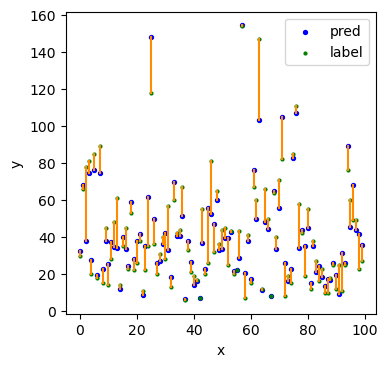

In [24]:
cuantos = 100
ypred = y_pred[:cuantos]
ylabel = list(y_test)[:cuantos]
x = list(range(len(ylabel)))
plt.rcParams["font.size"] = 10
figure, ax = plt.subplots(1,figsize=(4, 4),dpi=100)    
for i in range(len(x)):
    plt.plot([x[i],x[i]],[ypred[i],ylabel[i]],color="darkorange")

plt.scatter(x,ypred, color='blue', label="pred",s=8)
plt.scatter(x,ylabel, color='green', label="label",s=4)


plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()